In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
path = "/content/drive/My Drive/Student/"

Mounted at /content/drive/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [3]:
## 加载数据
file_path = "/content/drive/My Drive/Student/all_top.csv"
source = pd.read_csv(file_path,header=None,usecols=[1],names=['data'])
data =[]
for index in range(len(source['data'])):
  raw_info = source.loc[index]
  data.append(raw_info[0])

x = np.arange(1,157)

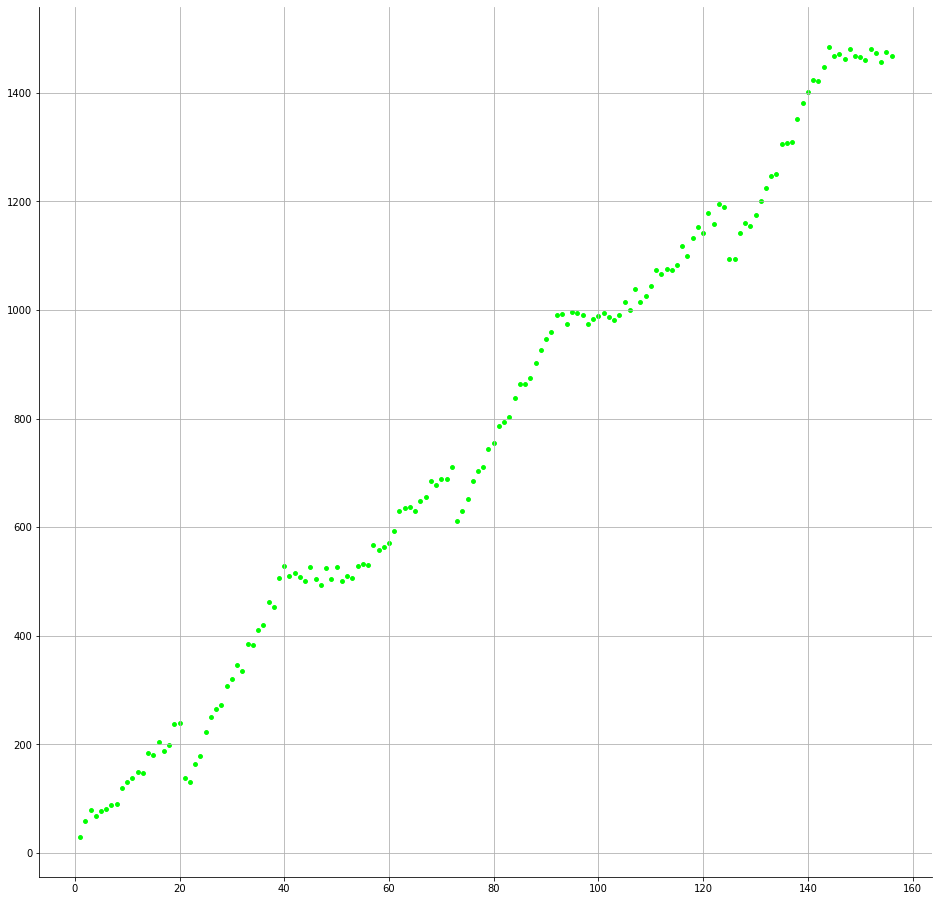

In [ ]:
# 画图象
# plot
fig, ax = plt.subplots(figsize=(16, 16))

ax.scatter(x, data, s=15, c='lime')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#x.axvspan(6, 11, facecolor='grey', alpha=0.2, **dict())
ax.grid()

plt.savefig(path+'original_graph')
plt.show()


In [4]:
## 线性回归函数 y=Bx+A
def linear(x,y):
  ave_x = 0.0
  ave_y = 0.0
  for index in range(len(x)):
    ave_x = ave_x+ x[index]
    ave_y = ave_y +y[index]
  ave_x = ave_x / len(x)
  ave_y = ave_y / len(y)

  b_up =0.0
  b_down =0.0
  for index in range(len(x)):
    b_up = b_up + (x[index]-ave_x)*(y[index]-ave_y)
    b_down = b_down+ (x[index]-ave_x)*(x[index]-ave_x)
  
  B = b_up/b_down
  A = ave_y - B*ave_x
  print('x average:',ave_x,'     y average:',ave_y)
  print('B:',B,"  A:",A)
  return A,B 

#计算R2误差
def R_square(x,y,A,B):
  ave_x = 0.0
  ave_y = 0.0
  for index in range(len(x)):
    ave_x = ave_x+ x[index]
    ave_y = ave_y +y[index]
  ave_x = ave_x / len(x)
  ave_y = ave_y / len(y)

  forecast_error= 0.0
  actual_error = 0.0
  mad_error = 0.0
  for index in range(len(x)):
    mad_error = mad_error+math.fabs(B*x[index]+A -y[index])
    forecast_error=forecast_error+(B*x[index]+A - ave_y)*(B*x[index]+A - ave_y)
    actual_error=actual_error+(y[index]-ave_y)*(y[index]-ave_y)
  R2 = forecast_error/actual_error
  mad_error = mad_error/len(x)
  print('R2 error:',R2)
  print('mad error: ',mad_error)

# 线性模型进行预测
def linear_fore(x,y,max_iter):
  result = y.copy()
  A,B = linear(x,y)
  for index in range(len(x)+1,max_iter+1):
    print("forecast:",index,"  value:",B*index+A)
    result.append(B*index+A)
  return result

# Double Exponential Forecast
def DoubleExp(x,alpa,beta,S0,B0,max_iter):
  result = x.copy()
  S_t = S0 
  S_t_ = 0.0
  B_t = B0
  B_t_ = 0.0
  error =  0.0
  print("S",0,':',S_t,"             B",0,':',B_t,"             F",1,':',S_t+B_t)
  print('error:',result[0]-S_t+B_t)

  for index in range(max_iter):
    S_t_ = alpa*result[index]+(1-alpa)*(S_t + B_t)
    B_t_ = beta*(S_t_ - S_t)+ (1-beta)*B_t
    S_t = S_t_
    B_t = B_t_
    if index<len(x)-1:
      error = error + math.fabs(result[index+1]-S_t-B_t)
      print("S",index+1,':',S_t,"      B",index+1,':',B_t,"     F",index+2,':',S_t+B_t,'      error:',result[index+1]-S_t-B_t)
    else:
      forecast= format(S_t+B_t, '.3f')
      result.append(float(forecast))
      print("S",index+1,':',S_t,"      B",index+1,':',B_t,"     Forecast_F",index+2,':',forecast)
    print()

  error = error/len(x)
  print('MAD: ',error )
  return result

# Exponential Forecast
def Exp(x,alpha,A0,max_iter):
  result = x.copy()
  A = 0.0  # A is a useful paramter , need details, please see the spesific formular
  F = 0.0
  mad_error = 0.0
  
  mad_error =mad_error + math.fabs(x[0]-A0)
  print("x1:",result[0],"      F1:",A0,"      abs_error:",math.fabs(result[0]-A0))
  print()
  for index in range(max_iter):
    if index == 0 :
      A = alpha*result[index]+(1-alpha)*A0
    else:
      A = alpha*result[index]+(1-alpha)*A
    F = A

    if(index<len(x)-1):
      mad_error =mad_error+math.fabs(F-x[index+1])
      print("x",index+2,":",result[index],"     ",
            "F",index+2,":",F,"     ",
            "abs_error:",math.fabs(F-result[index+1]))
      print()
    else:
      print("F_Forecast",index+2,":",F)
      result.append(F)
  mad_error = mad_error / len(x) 
  print("mad eorror :",mad_error)

  return result

In [5]:
len(data)

156

In [ ]:
# Linear Model
x_linear =np.arange(1,157)
data_linear = linear_fore(x=x_linear,y=data,max_iter=208)

In [ ]:
# 画图 libear Regression
fig, ax = plt.subplots(figsize=(16, 16))

ax.scatter(np.arange(1,209), data_linear, s=15, c='lime')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axvspan(157,209, facecolor='grey', alpha=0.2, **dict())
ax.grid()

plt.show()

In [ ]:
# Exponential Model
data_exp = Exp(data,alpha=0.9,A0=30,max_iter = 207)

fig, ax = plt.subplots(figsize=(16, 16))

x_exp =np.arange(1,209)
ax.scatter(x_exp, data_exp, s=15, c='lime')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axvspan(157,209, facecolor='grey', alpha=0.2, **dict())
ax.grid()

plt.show()

In [ ]:
# Double Exponential
data_double = DoubleExp(x=data,alpa=0.3,beta=0.1,S0=30,B0=10,max_iter=207)

In [ ]:
# plot the graph 
fig, ax = plt.subplots(figsize=(16, 16))

x_pro =np.arange(1,209)
ax.scatter(x_pro, data_double, s=10, c='lime')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axvspan(157,209, facecolor='grey', alpha=0.2, **dict())
ax.grid()

plt.savefig(path+'double_graph')
plt.show()

x average: 2.0      y average: 564.6666666666666
B: 475.0   A: -385.33333333333337
forecast: 4   value: 1514.6666666666665
[88, 568, 1038, 1514.6666666666665]
x average: 2.0      y average: 554.0
B: 462.0   A: -370.0
forecast: 4   value: 1478.0
[90, 558, 1014, 1478.0]
x average: 2.0      y average: 569.3333333333334
B: 453.5   A: -337.66666666666663
forecast: 4   value: 1476.3333333333335
[119, 563, 1026, 1476.3333333333335]
x average: 2.0      y average: 582.0
B: 457.0   A: -332.0
forecast: 4   value: 1496.0
[131, 570, 1045, 1496.0]
x average: 2.0      y average: 602.0
B: 467.5   A: -333.0
forecast: 4   value: 1537.0
[139, 593, 1074, 1537.0]
x average: 2.0      y average: 615.0
B: 459.0   A: -303.0
forecast: 4   value: 1533.0
[149, 629, 1067, 1533.0]
x average: 2.0      y average: 619.3333333333334
B: 464.0   A: -308.66666666666663
forecast: 4   value: 1547.3333333333335
[147, 636, 1075, 1547.3333333333335]
x average: 2.0      y average: 631.6666666666666
B: 444.5   A: -257.3333333333

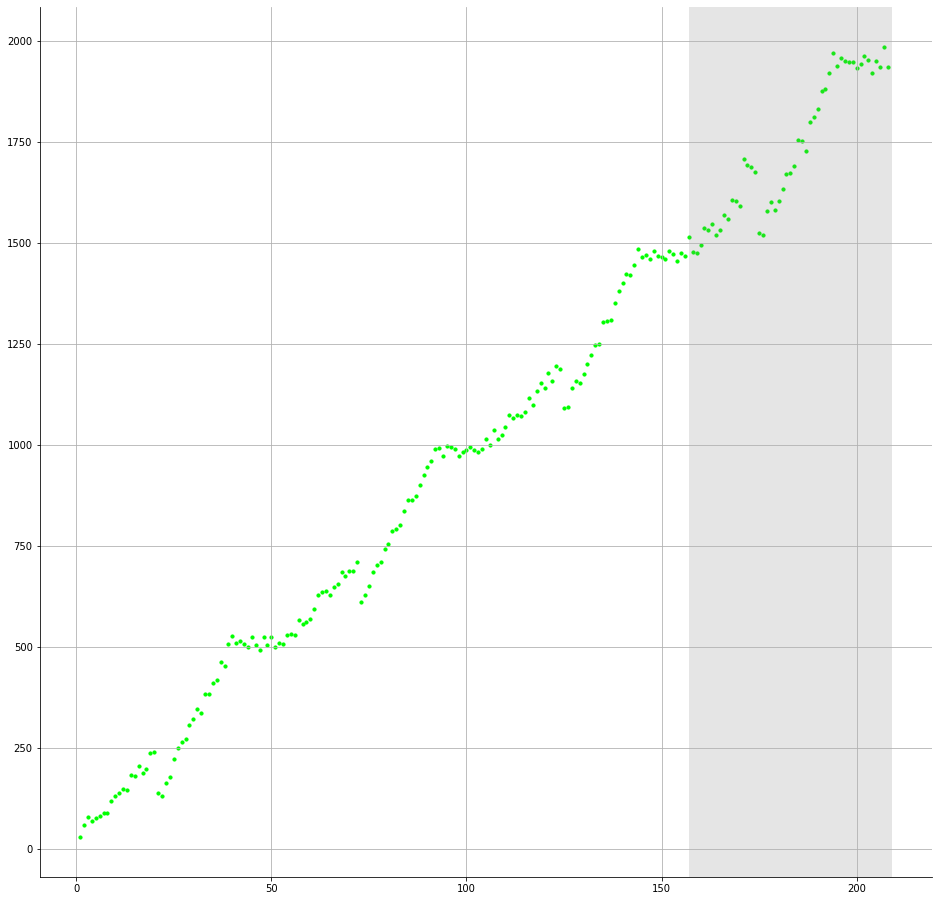

In [26]:
## A spesific process for mth203 coursework 1 Q3
# we are aimed to imitate the seasonal effect
data_advanced = data.copy()
for index in range(52):
  sub_data = []
  for i in range(1,4):
    #print(len(data_advanced)-50*i)
    sub_data.append(data_advanced[len(data_advanced)-50*i])
  sub_data = sub_data[::-1]

  
  x_linear =np.arange(1,4)
  forecast = linear_fore(x=x_linear,y=sub_data,max_iter=4)
  print(forecast)
  data_advanced.append(forecast[3])
  

# plot the graph 
fig, ax = plt.subplots(figsize=(16, 16))

x_pro =np.arange(1,209)
ax.scatter(x_pro, data_advanced, s=10, c='lime')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axvspan(157,209, facecolor='grey', alpha=0.2, **dict())
ax.grid()

plt.savefig(path+'double_graph')
plt.show()


In [16]:
data_advanced[-5:]

[203.0, 204.0, 205.0, 206.0, 207.0]

In [ ]:
data_advanced = data.copy()
for index in range(5):
  sub_data = []
  for i in range(1,4):
    sub_data.append(len(data_advanced)-50*i)
  sub_data = sub_data[::-1]
  
  forecast = DoubleExp(x=sub_data,alpa=0.3,beta=0.1,S0=30,B0=10,max_iter=3)
  print(forecast)
  data_advanced.append(forecast[3])
  

1.23